remove those features that are most useful keywords for distinguishing target is author or not. 
if the target is the author, then whatever differences there are between their keywords will be reflected in only a relatively small number of features, despite possible differences in theme, genre and the like.

In [107]:
import json

# Openinng the JSON file
openTrainData = open('data/train.json');
openTestData = open('data/test.json');

# returns JSON object as
# a dictionary
trainData = json.load(openTrainData);
testData = json.load(openTestData);

# Iterating through the trainData
#for i in trainData:
#    print(trainData[i]);

# Iterating through the testData
#for i in testData:
#    print(testData[i]);

# Closing file
openTrainData.close();
openTestData.close();

len(trainData.items())

26108

In [108]:
from collections import defaultdict
import random
import copy

authorIndexListDict = defaultdict(list)
authorCounter = defaultdict(int)
for k,v in trainData.items():
    for author in v["author"]:
        authorIndexListDict[author].append(k)
        authorCounter[author] += 1
print("min freq author happen " + str(min(authorCounter, key=authorCounter.get)) + " times")

min freq author happen 2217 times


In [109]:
def becomeFalse (dict):
    allAuthor = list(range(2032))
    authors = copy.deepcopy(dict["author"])
    authors.append(dict["target"])
    complement = [author for author in allAuthor if author not in authors]
    [temp] = random.sample(complement, 1)
    dict["target"] = temp


randomAuthorsList2000 = random.sample(range(0, 2032), 2000)

devData = {}
for author in randomAuthorsList2000:
    while(True):
        [sampleChoosen] = random.sample(authorIndexListDict[author], 1)
        if not sampleChoosen in devData.keys():
            devData[sampleChoosen] = trainData[sampleChoosen]
            devData[sampleChoosen]["target"] = author
            devData[sampleChoosen]["TrueTarget"] = author
            devData[sampleChoosen]["author"].remove(author)
            trainData.pop(sampleChoosen)
            break
            
len(trainData.items())
falseDevdataKey = random.sample(list(devData.keys()) , 1000)
for k in falseDevdataKey:
    becomeFalse(devData[k])
for k, v in devData.items():
    v["coauthor"] = v.pop("author")
    if v["target"] == v["TrueTarget"]:
        v["label"] = 1
    else:
        v["label"] = 0

In [112]:
print("Develop set is devData, it has " + str(len(devData)) + " papers")
for k, v in devData.items():
    print(v.keys())
    break
print("train set is trainData, it has " + str(len(trainData)) + " papers")

Develop set is devData, it has 2000 papers
dict_keys(['venue', 'keywords', 'year', 'target', 'TrueTarget', 'coauthor', 'label'])
train set is trainData, it has 24108 papers


In [113]:
from collections import Counter

# create a dict to store the keywords associated with author
authorDict = {}
for i in range(2302):
    authorDict[i] = []

# add associate keywords to the author
for i in trainData:
    keywords = trainData[i]['keywords']
    authors = trainData[i]['author']
    for author in authors:
        authorDict[author] = authorDict[author] + keywords

# modify the keywords with counter which will show the keywords and its frequency
for i in authorDict:
    authorDict[i]=Counter(authorDict[i])
    authorDict[i]=dict(authorDict[i])

 for each key, use the feq 

In [114]:
dev_predict = []

for i in devData:
    target = devData[i]['target']
    keywords = devData[i]['keywords']
    count = 0
    total = len(keywords)
    authorKey = authorDict[target].keys()
    for j in keywords:
        if j in authorKey:
            count=count+1
    dev_predict.append(count/total)

In [115]:
dev_true = []
for k,v in devData.items():
    dev_true.append(v["label"])

In [117]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(dev_true, dev_predict, pos_label=1)
metrics.auc(fpr, tpr)

0.7537769999999999

remove most freq

In [135]:
auc_x = list(range(10))
auc_y = []

authorDict_deep = copy.deepcopy(authorDict)
devData_deep = copy.deepcopy(devData)

for removeNum in auc_x:
    dev_predict = []
    for i in devData_deep:
        target = devData_deep[i]['target']
        keywords = devData_deep[i]['keywords']
        count = 0
        if removeNum != 0:
            max_keyword = max(authorDict_deep[target], key=authorDict_deep[target].get)
            authorDict_deep[target].pop(max_keyword)
            if max_keyword in keywords:
                keywords.remove(max_keyword)

        total = len(keywords)
        authorKey = authorDict_deep[target].keys()
        for j in keywords:
            if j in authorKey:
                count=count+1
        dev_predict.append(count/total)
    try:
        fpr, tpr, thresholds = metrics.roc_curve(dev_true, dev_predict, pos_label=1)
    except:
        print(dev_predict)
    auc_y.append(metrics.auc(fpr, tpr))

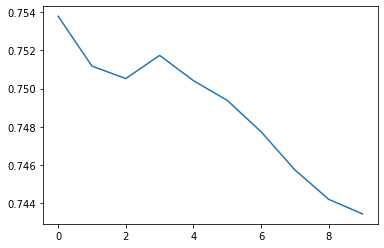

In [136]:
from matplotlib.pyplot import plot
plot(auc_x, auc_y)
x_l

In [137]:
auc_x = list(range(10))
auc_y = []

authorDict_deep = copy.deepcopy(authorDict)
devData_deep = copy.deepcopy(devData)

for removeNum in auc_x:
    dev_predict = []
    for i in devData_deep:
        target = devData_deep[i]['target']
        keywords = devData_deep[i]['keywords']
        count = 0
        if removeNum != 0:
            max_keyword = max(authorDict_deep[target], key=authorDict_deep[target].get)
            authorDict_deep[target].pop(max_keyword)
            if max_keyword in keywords:
                keywords.remove(max_keyword)

        total = sum(authorDict_deep[target].values())
        authorKey = authorDict_deep[target].keys()
        for j in keywords:
            if j in authorKey:
                count=count+ authorDict_deep[target][j]
        dev_predict.append(count/total)
    try:
        fpr, tpr, thresholds = metrics.roc_curve(dev_true, dev_predict, pos_label=1)
    except:
        print(dev_predict)
    auc_y.append(metrics.auc(fpr, tpr))

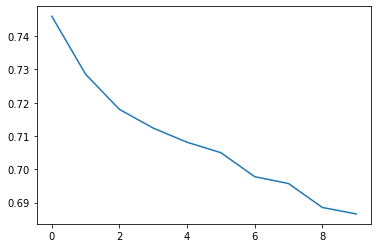

In [138]:
from matplotlib.pyplot import plot
plot(auc_x, auc_y)

Removing the most frequent n keywords did not get better results